# Доверительные интервалы для среднего

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

In [1]:
from __future__ import division

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from scipy import stats
from scipy.stats import norm
from statsmodels.stats.weightstats import _tconfint_generic
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

In [2]:
data = pd.read_csv('../data/water.txt', sep='\t')

In [3]:
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81



Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [4]:
_tconfint_generic(data.mortality.mean(), data.mortality.std(ddof=1)/np.sqrt(len(data)), len(data)-1, 0.05, 'two-sided')

(1476.0833413552848, 1572.2117406119285)

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [5]:
_tconfint_generic(data[data.location == 'South'].mortality.mean(), \
                  data[data.location == 'South'].mortality.std(ddof=1) / np.sqrt(len(data[data.location == 'South'])),\
                  len(data[data.location == 'South']) - 1, 0.05, 'two-sided')

(1320.1517462936238, 1433.463638321761)

На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

In [6]:
_tconfint_generic(data[data.location == 'North'].mortality.mean(), \
                  data[data.location == 'North'].mortality.std(ddof=1) / np.sqrt(len(data[data.location == 'North'])),\
                  len(data[data.location == 'North']) - 1, 0.05, 'two-sided')

(1586.5605251961385, 1680.6394748038613)

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [7]:
_tconfint_generic(data[data.location == 'South'].hardness.mean(), \
                  data[data.location == 'South'].hardness.std(ddof=1) / np.sqrt(len(data[data.location == 'South'])),\
                  len(data[data.location == 'South']) - 1, 0.05, 'two-sided')
_tconfint_generic(data[data.location == 'North'].hardness.mean(), \
                  data[data.location == 'North'].hardness.std(ddof=1) / np.sqrt(len(data[data.location == 'North'])), \
                  len(data[data.location == 'North']) - 1, 0.05, 'two-sided')

(21.42248728572426, 39.37751271427574)

Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией σ^2:

<img src="../data/1.png">

При σ=1 какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью ± 0.1?

In [8]:
np.ceil((norm.ppf(1-0.05/2) / 0.1)**2)

385.0

# Доверительные интервалы для долей

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [9]:
from statsmodels.stats.proportion import proportion_confint

In [10]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [11]:
my_proportion_confint(1,50)

(-0.018805307081790987, 0.05880530708179099)

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [12]:
proportion_confint(1, 50, alpha=0.05, method='wilson')

(0.003539259271646236, 0.10495443589637815)

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью 
±0.01 на уровне доверия 95%?

In [13]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [14]:
np.ceil(samplesize_confint_proportion(0.02, 0.01))

753.0

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [15]:
proportion = np.linspace(0, 1, 101)

n_samples = np.empty(proportion.shape)
for i, p in enumerate(proportion):
    n_samples[i] = int(np.ceil(samplesize_confint_proportion(p, 0.01)))

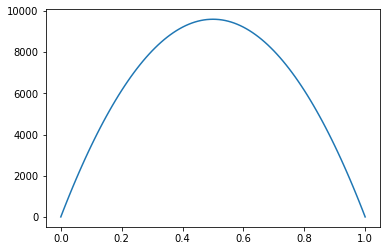

In [16]:
plt.plot(proportion, n_samples);

In [17]:
n_samples[np.where(proportion == 0.5)]

array([9604.])

In [18]:
np.ceil(samplesize_confint_proportion(0.5, 0.01))

9604.0

# Доверительные интервалы

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины $X\sim N\left(\mu,\sigma^2\right)$ лежит в интервале $\mu\pm c \cdot \sigma$. Чему равно точное значение константы $c$? Округлите ответ до четырёх знаков после десятичной точки.

In [19]:
print('c =', round(float(norm.ppf(1-(1-0.997)/2)), 4))

c = 2.9677


В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [20]:
aspirin_data = np.array( [1 if i<104 else 0 for i in range(11037)] )
placebo_data = np.array( [1 if i<189 else 0 for i in range(11034)] )

prob_infarction_aspirin = aspirin_data.sum() / aspirin_data.shape[0]
prob_infarction_placebo = placebo_data.sum() / placebo_data.shape[0]
print('Infarction probability (aspirin): %.4f' % prob_infarction_aspirin)
print('Infarction probability (placebo): %.4f' % prob_infarction_placebo)
print('Infarction probability decrease: %.4f' % (prob_infarction_placebo - prob_infarction_aspirin))

Infarction probability (aspirin): 0.0094
Infarction probability (placebo): 0.0171
Infarction probability decrease: 0.0077


Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

In [21]:
def proportions_confint_diff_ind(sample1, sample2, alpha=0.05):    
    z = norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [22]:
print('Confidence interval: [%.4f, %.4f]' % proportions_confint_diff_ind(placebo_data, aspirin_data))

Confidence interval: [0.0047, 0.0107]


Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин X∼Ber(p) часто вычисляют величину p(1-p), которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо p нужно подставить $\hat{p}$. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как

<img src="../data/2.png">

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [23]:
def odds(data):
    p = data.sum() / data.shape[0]
    return p / (1 - p)

In [24]:
odds_aspirin = odds(aspirin_data)
print('Odds aspirin: %.4f' % odds_aspirin)
odds_placebo = odds(placebo_data)
print('Odds aspirin: %.4f' % odds_placebo)

Odds aspirin: 0.0095
Odds aspirin: 0.0174


In [25]:
print('Times decrease of infarction: %.4f' % (odds_placebo / odds_aspirin))

Times decrease of infarction: 1.8321


Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

- составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
- установите random seed=0;
- сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [26]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [27]:
np.random.seed(0)
odds_aspirin_data = np.array(list(map(odds, get_bootstrap_samples(aspirin_data, 1000))))
odds_placebo_data = np.array(list(map(odds, get_bootstrap_samples(placebo_data, 1000))))

print('95%% confidence interval for times decrease of infarction: %s' %
      str(stat_intervals(odds_placebo_data / odds_aspirin_data, 0.05)))

95% confidence interval for times decrease of infarction: [1.44419465 2.34321168]


# Практика проверки гипотез

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [28]:
n = 100
prob = 0.75
F_H0 = stats.binom(n, prob)

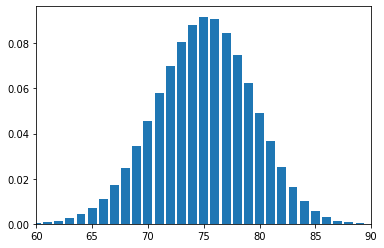

In [29]:
x = np.linspace(0,100,101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(60, 90) 
plt.show()

In [30]:
print('p-value: %.4f' % stats.binom_test(67, 100, prob))

p-value: 0.0822


Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [31]:
print('p-value: %.10f' % stats.binom_test(22, 50, prob))

p-value: 0.0000034831


The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200)

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [32]:
pines_data = pd.read_table('../data/pines.txt')
pines_data.describe()
pines_data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


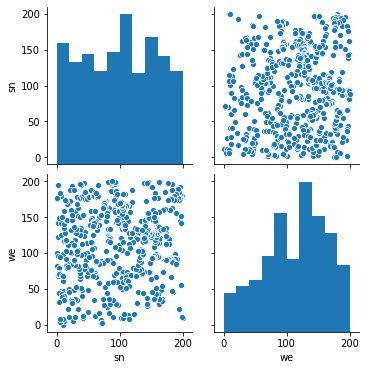

In [33]:
sns.pairplot(pines_data)

In [34]:
sn_num, we_num = 5, 5

trees_bins = stats.binned_statistic_2d(pines_data.sn, pines_data.we, None, statistic='count', bins=[sn_num, we_num])

trees_squares_num = trees_bins.statistic
trees_squares_num
trees_bins.x_edge
trees_bins.y_edge

array([  0.,  40.,  80., 120., 160., 200.])

In [35]:
mean_trees_num = np.sum(trees_squares_num) / 25
print(mean_trees_num)

23.36


Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [36]:
stats.chisquare(trees_squares_num.flatten(), ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

# Критерии Стьюдента

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [37]:
exp_calc = 9.5
st_dev_calc = 0.4

num = 160
mean_calc = 9.57

In [38]:
def z_test(mean_val, exp_val, st_dev, num):
    standard_error = st_dev / np.sqrt(num)
    return (mean_val - exp_val) / standard_error

In [39]:
z_stat_calc = z_test(mean_calc, exp_calc, st_dev_calc, num)
z_stat_calc

2.213594362117875

In [40]:
def p_val_double(z_stat):
    return 2 * (1 - stats.norm.cdf(z_stat))

In [41]:
print('p-value: %.4f' % p_val_double(z_stat_calc))

p-value: 0.0269


Имеются данные о стоимости и размерах 53940 бриллиантов

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

1. линейную регрессию с помощью LinearRegression без параметров
2. случайный лес из 10 деревьев с помощью RandomForestRegressor с random_state=1.

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

In [42]:
diamonds = pd.read_table('../data/diamonds.txt')
diamonds.describe()
diamonds.head()
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [43]:
X_diam = diamonds.drop(['price'], axis=1)
X_diam.shape
y_diam = diamonds.loc[:, diamonds.columns == 'price']
np.ravel(y_diam).shape

(53940,)

In [44]:
X_diam_train, X_diam_test, y_diam_train, y_diam_test = train_test_split(X_diam, y_diam, random_state=1)

clf_lr = LinearRegression()
clf_lr.fit(X_diam_train, y_diam_train)

pred_price_lr = clf_lr.predict(X_diam_test)

pred_price_lr_sub = pred_price_lr - y_diam_test
pred_price_lr_sub.describe()

,price
count,13485.000000
mean,19.229235
std,1463.058136
min,-12455.940789
25%,-342.670547
50%,63.649682
75%,652.518106
max,18239.846360


In [45]:
clf_rf = RandomForestRegressor(random_state=1)
clf_rf.fit(X_diam_train, y_diam_train.values.ravel())

RandomForestRegressor(random_state=1)

In [46]:
pred_price_rf = clf_rf.predict(X_diam_test)

pred_price_rf_sub = pred_price_rf[:, np.newaxis] - y_diam_test
pred_price_rf_sub.describe()

,price
count,13485.000000
mean,47.618441
std,1358.593645
min,-13484.020000
25%,-237.173333
50%,40.846819
75%,403.930000
max,8837.150000


In [47]:
stats.ttest_rel(np.abs(pred_price_lr_sub), np.abs(pred_price_rf_sub))

Ttest_relResult(statistic=array([18.03725974]), pvalue=array([6.93682348e-72]))

In [48]:
print( "95%% confidence interval: [%f, %f]" % \
      DescrStatsW(np.abs(pred_price_lr_sub) - np.abs(pred_price_rf_sub)).tconfint_mean())

95% confidence interval: [98.638526, 122.690758]


# Параметрические критерии

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

In [49]:
data_exp = np.array( [1 if i < 10 else 0 for i in range(34)] )
data_ctrl = np.array( [1 if i < 4 else 0 for i in range(16)] )

print('Mean experimental value: %.4f' % data_exp.mean())
print('Mean control value: %.4f' % data_ctrl.mean())

Mean experimental value: 0.2941
Mean control value: 0.2500


In [50]:
conf_interval_banner_exp = proportion_confint(np.sum(data_exp), len(data_exp), method = 'wilson')
conf_interval_banner_ctrl = proportion_confint(np.sum(data_ctrl), len(data_ctrl), method = 'wilson')

print('95%% confidence interval for exp group: [%f, %f]' % conf_interval_banner_exp)
print('95%% confidence interval for a ctrl group: [%f, %f]' % conf_interval_banner_ctrl)

95% confidence interval for exp group: [0.168346, 0.461689]
95% confidence interval for a ctrl group: [0.101821, 0.494983]


In [51]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [52]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [53]:
def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [54]:
print('95%% confidence interval for a difference: [%.4f, %.4f]' % \
                                                  proportions_diff_confint_ind(data_exp, data_ctrl))

95% confidence interval for a difference: [-0.2176, 0.3058]


In [55]:
print('p-value: %.4f' % proportions_diff_z_test(proportions_diff_z_stat_ind(data_exp, data_ctrl), 'greater'))

p-value: 0.3729


Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными.

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:
- логистическая регрессия по признакам X1,X2,X3; 
- логистическая регрессия по признакам X4,X5,X6. 

Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [56]:
banknotes_data = pd.read_table('../data/banknotes.txt')
banknotes_data.describe()
banknotes_data.info()
banknotes_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   X3      200 non-null    float64
 3   X4      200 non-null    float64
 4   X5      200 non-null    float64
 5   X6      200 non-null    float64
 6   real    200 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


,X1,X2,X3,X4,X5,X6,real
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [57]:
banknotes_train, banknotes_test = train_test_split(banknotes_data, test_size=50, random_state=1)
banknotes_train.shape
banknotes_test.shape

(50, 7)

In [58]:
features_1 = [u'X1', u'X2', u'X3']
clf_logreg_1 = LogisticRegression()
clf_logreg_1.fit(banknotes_train[features_1].values, banknotes_train[u'real'].values)

LogisticRegression()

In [59]:
pred_1 = clf_logreg_1.predict(banknotes_test[features_1].values)
print('Error rate pred1: %f' % (1 - accuracy_score(banknotes_test[u'real'].values, pred_1)))
err_1 = np.array( [1 if banknotes_test[u'real'].values[i] == pred_1[i] else 0 for i in range(len(pred_1))] )
err_1

Error rate pred1: 0.200000


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1])

In [60]:
features_2 = [u'X4', u'X5', u'X6']
clf_logreg_2 = LogisticRegression()
clf_logreg_2.fit(banknotes_train[features_2].values, banknotes_train[u'real'].values)

LogisticRegression()

In [61]:
pred_2 = clf_logreg_2.predict(banknotes_test[features_2].values)
print('Error rate pred2: %f' % (1 - accuracy_score(banknotes_test[u'real'].values, pred_2)))
err_2 = np.array( [1 if banknotes_test[u'real'].values[i] == pred_2[i] else 0 for i in range(len(pred_2))] )
err_2

Error rate pred2: 0.020000


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [62]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [63]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [64]:
print('95%% confidence interval for a difference between predictions: [%.4f, %.4f]' %
      proportions_diff_confint_rel(err_1, err_2))

95% confidence interval for a difference between predictions: [-0.2865, -0.0735]


In [65]:
print('p-value: %f' % proportions_diff_z_test(proportions_diff_z_stat_rel(err_1, err_2)))

p-value: 0.000923


Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [66]:
avg_mark = 541.4
avg_mark_data = np.ones(100) * avg_mark

exp_mark = 525.
st_dev = 100.

In [67]:
def z_test(mean_val, exp_val, st_dev, num):
    standard_error = st_dev / np.sqrt(num)
    return (mean_val - exp_val) / standard_error

In [68]:
def p_val_greater(z_stat):
    return 1 - stats.norm.cdf(z_stat)

In [69]:
z_stat = z_test(avg_mark, exp_mark, st_dev, (len(avg_mark_data)))
z_stat

1.6399999999999977

In [70]:
p_val = p_val_greater(z_stat)
p_val

0.05050258347410397

In [71]:
avg_mark2 = 541.5

In [72]:
z_stat2 = z_test(avg_mark2, exp_mark, st_dev, (len(avg_mark_data)))
z_stat2

1.65

In [73]:
p_val2 = p_val_greater(z_stat2)
p_val2

0.0494714680336481

# Непараметрические критерии

Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

49,58,75,110,112,132,151,276,281,362 

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы H0:medX=200 на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет.

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [74]:
surv_data = np.array( [49, 58, 75, 110, 112, 132, 151, 276, 281, 362] )
surv_data
surv_data.mean()

160.6

In [75]:
exp_surv = 200
stats.wilcoxon(surv_data - exp_surv)

WilcoxonResult(statistic=17.0, pvalue=0.322265625)

В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

22,22,15,13,19,19,18,20,21,13,13,15,

и в 9 лесах, где идёт вырубка:

17,18,18,15,12,4,14,15,10.

Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

In [76]:
forest_not_cut = np.array( [22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15] )
forest_not_cut.mean()
forest_cut = np.array( [17, 18, 18, 15, 12, 4, 14, 15, 10] )
forest_cut.mean()

13.666666666666666

In [77]:
stats.mannwhitneyu(forest_not_cut, forest_cut, alternative='greater')

MannwhitneyuResult(statistic=81.0, pvalue=0.02900499272087373)

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

- установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
- сделайте по 1000 псевдовыборок из каждой выборки.

In [78]:
challenger = pd.read_csv('../data/challenger.txt', delimiter='\t')
challenger.describe()
challenger.info()
challenger.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   23 non-null     object 
 1   Temperature  23 non-null     float64
 2   Incident     23 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 680.0+ bytes


,Unnamed: 0,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [79]:
challenger.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
challenger.head()

,Date,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0


In [80]:
challenger_broken = challenger.loc[challenger.loc[:, 'Incident'] == 1, :].drop(['Date', 'Incident'], axis=1)
challenger_broken
challenger_not_broken = challenger.loc[challenger.loc[:, 'Incident'] != 1, :].drop(['Date', 'Incident'], axis=1)
challenger_not_broken

,Temperature
0,18.9
2,20.6
3,20.0
4,19.4
5,22.2
6,22.8
7,21.1
11,25.6
12,19.4
14,19.4


In [81]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [82]:
np.random.seed(0)
challenger_broken_bs_mean = \
        np.array(list(map(np.mean, get_bootstrap_samples(challenger_broken['Temperature'].values, 1000))))
challenger_not_broken_bs_mean = \
        np.array(list(map(np.mean, get_bootstrap_samples(challenger_not_broken['Temperature'].values, 1000))))

In [83]:
print('95%% confidence interval for times decrease of infarction: %s' %
      str(stat_intervals(challenger_broken_bs_mean - challenger_not_broken_bs_mean, 0.05)))

95% confidence interval for times decrease of infarction: [-8.06457589 -1.45040179]


На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:

- установите random seed = 0;
- возьмите 10000 перестановок.

In [84]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [85]:
np.random.seed(0)
print('p-value: %.4f' % permutation_test(challenger_broken['Temperature'].values,
                                         challenger_not_broken['Temperature'].values, max_permutations=10000))

p-value: 0.0057


# Коэффициенты корреляции

Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

In [86]:
illiteracy = pd.read_csv('../data/illiteracy.txt', delimiter='\t')
illiteracy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  94 non-null     object 
 1   Illit    94 non-null     float64
 2   Births   94 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.3+ KB


In [87]:
illiteracy.describe()
illiteracy.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [88]:
il_pearsonr = stats.pearsonr(illiteracy['Illit'], illiteracy['Births'])
print('Pearson correlation: %.4f' % il_pearsonr[0])

Pearson correlation: 0.7687


Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.

In [89]:
il_spearmanr = stats.spearmanr(illiteracy['Illit'], illiteracy['Births'])
print('Spearman correlation: %.4f' % il_spearmanr[0])

Spearman correlation: 0.7530


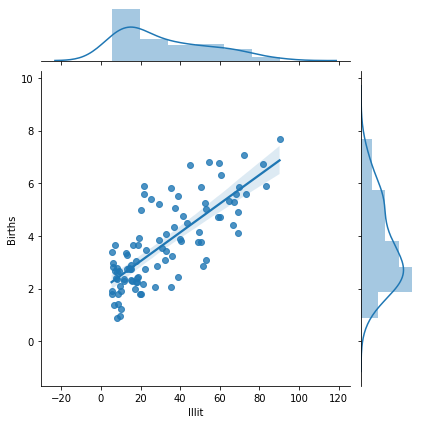

In [90]:
sns.jointplot('Illit', 'Births', illiteracy, kind="reg");

# Корреляционный анализ

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [91]:
water = pd.read_csv('../data/water.txt', delimiter='\t')
water.info()
water.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [92]:
water.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


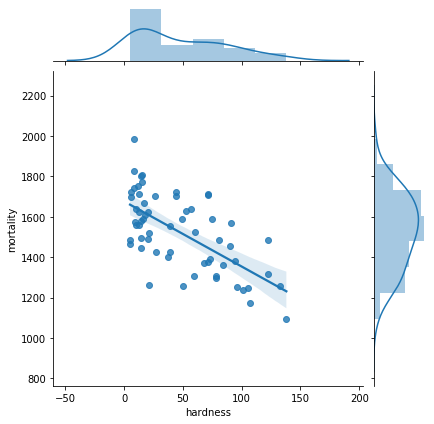

In [93]:
sns.jointplot('hardness', 'mortality', water, kind="reg");

In [94]:
print('Pearson correlation: %.4f' % stats.pearsonr(water.hardness, water.mortality)[0])

Pearson correlation: -0.6548


В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [95]:
print('Spearman correlation: %.4f' % stats.spearmanr(water.hardness, water.mortality)[0])

Spearman correlation: -0.6317


Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [96]:
water_south = water[water.location == 'South']
water_north = water[water.location == 'North']
water_south.shape
water_north.shape

(35, 4)

In [97]:
print('Pearson "South" correlation: %.4f' % stats.pearsonr(water_south.hardness, water_south.mortality)[0])
print('Pearson "North" correlation: %.4f' % stats.pearsonr(water_north.hardness, water_north.mortality)[0])

Pearson "South" correlation: -0.6022
Pearson "North" correlation: -0.3686


Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [98]:
bars_sex = np.array([[203., 239.], [718., 515.]])

In [99]:
def matthewsr(a, b, c, d):
    return (a*d - b*c) / np.sqrt((a + b)*(a + c)*(b + d)*(c + d))

In [100]:
matthews_coeff = matthewsr(*bars_sex.flatten())
print('Matthews correlation: %.4f' % matthews_coeff)

Matthews correlation: -0.1090


В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [101]:
bars_sex.shape
print('Matthews significance p-value: %f' % stats.chi2_contingency(bars_sex)[1])

Matthews significance p-value: 0.000011


В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [102]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = sample1[0] / np.sum(sample1)
    p2 = sample2[0] / np.sum(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    
    return (left_boundary, right_boundary)

In [103]:
print('95%% confidence interval for a difference of men and women: [%.4f, %.4f]' %
      proportions_diff_confint_ind(bars_sex[:,1], bars_sex[:,0]))

95% confidence interval for a difference of men and women: [0.0539, 0.1392]


Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [104]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [105]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [106]:
print('p-value: %f' % proportions_diff_z_test(proportions_diff_z_stat_ind(bars_sex[:,1], bars_sex[:,0])))

p-value: 0.000008


Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

    Не доволен Более или менее Доволен
    Не очень счастлив 197 111 33
    Достаточно счастлив 382 685 331
    Очень счастлив 110 342 333
    
Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [107]:
happiness = np.array( [[197., 111., 33. ],
                       [382., 685., 331.],
                       [110., 342., 333.]] )

In [108]:
stats.chi2_contingency(happiness)
print('Chi2 stat value: %.4f' % stats.chi2_contingency(happiness)[0])

Chi2 stat value: 293.6831


На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [109]:
print('Chi2 stat p-value: %.62f' % stats.chi2_contingency(happiness)[1])

Chi2 stat p-value: 0.00000000000000000000000000000000000000000000000000000000000002


Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [110]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [111]:
print('V Cramer stat value: %.4f' % cramers_stat(happiness))

V Cramer stat value: 0.2412


# Множественная проверка гипотез

Классификатор C4.5 и три его модификации: с оптимизацией гиперпараметра m, гиперпараметра cf и с одновременной оптимизацией обоих гиперпараметров. Эти четыре классификатора сравнивались на 14 наборах данных. На каждом датасете был посчитан AUC каждого классификатора. Данные записаны в файле.

Используя критерий знаковых рангов, проведите попарное сравнение каждого классификатора с каждым. Выберите два классификатора, различие между которыми наиболее статистически значимо.

In [112]:
aucs = pd.read_csv('../data/AUCs.txt', delimiter='\t')
aucs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14 non-null     object 
 1   C4.5        14 non-null     float64
 2   C4.5+m      14 non-null     float64
 3   C4.5+cf     14 non-null     float64
 4   C4.5+m+cf   14 non-null     float64
dtypes: float64(4), object(1)
memory usage: 688.0+ bytes


In [113]:
aucs.columns = [u'Dataset', u'C4.5', u'C4.5+m', u'C4.5+cf', u'C4.5+m+cf']
aucs

,Dataset,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898
5,iris,0.936,0.931,0.916,0.931
6,liver disorders,0.661,0.668,0.609,0.685
7,lung cancer,0.583,0.583,0.563,0.625
8,lymphography,0.775,0.838,0.866,0.875
9,mushroom,1.000,1.000,1.000,1.000


In [114]:
from itertools import combinations

w_stat = pd.DataFrame(columns=['Model 1', 'Model 2', 'Wilcoxon stat', 'p-value'])
k = 0
for i, j in combinations([1, 2, 3, 4], 2):
    w_stat.loc[k, 'Model 1'], w_stat.loc[k, 'Model 2'] = aucs.columns[i], aucs.columns[j]
    w_stat.loc[k, 'Wilcoxon stat'], w_stat.loc[k, 'p-value'] = stats.wilcoxon(aucs.iloc[:, i], aucs.iloc[:, j])
    k += 1


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [115]:
w_stat

,Model 1,Model 2,Wilcoxon stat,p-value
0,C4.5,C4.5+m,6.5,0.0107571
1,C4.5,C4.5+cf,43,0.861262
2,C4.5,C4.5+m+cf,11,0.0159064
3,C4.5+m,C4.5+cf,17,0.0463327
4,C4.5+m,C4.5+m+cf,22,0.327826
5,C4.5+cf,C4.5+m+cf,10,0.0229091


Сколько статистически значимых на уровне 0.05 различий мы обнаружили?

In [116]:
diff_models_cnt = w_stat.loc[w_stat.loc[:, 'p-value'] <= 0.05, :].shape[0]
print('Number of p-value <= 0.05: %d' % diff_models_cnt)

Number of p-value <= 0.05: 4


Сравнивая 4 классификатора между собой, мы проверили 6 гипотез. Давайте сделаем поправку на множественную проверку. Начнём с метода Холма. Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки этим методом?

In [117]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [118]:
reject, p_corrected, a1, a2 = multipletests(w_stat['p-value'], alpha = 0.05, method = 'holm')

In [119]:
w_stat['p_corrected'] = p_corrected
w_stat['reject'] = reject

In [120]:
w_stat

,Model 1,Model 2,Wilcoxon stat,p-value,p_corrected,reject
0,C4.5,C4.5+m,6.5,0.0107571,0.0645428,False
1,C4.5,C4.5+cf,43,0.861262,0.861262,False
2,C4.5,C4.5+m+cf,11,0.0159064,0.0795322,False
3,C4.5+m,C4.5+cf,17,0.0463327,0.138998,False
4,C4.5+m,C4.5+m+cf,22,0.327826,0.655651,False
5,C4.5+cf,C4.5+m+cf,10,0.0229091,0.0916364,False


In [121]:
diff_models_cnt = w_stat.loc[w_stat.loc[:, 'p_corrected'] <= 0.05, :].shape[0]
print('Number of p-value <= 0.05: %d' % diff_models_cnt)

Number of p-value <= 0.05: 0


Сколько гипотез можно отвергнуть на уровне значимости 0.05 после поправки методом Бенджамини-Хохберга?

In [122]:
reject, p_corrected, a1, a2 = multipletests(w_stat['p-value'], alpha = 0.05, method = 'fdr_bh')

In [123]:
w_stat['p_corrected'] = p_corrected
w_stat['reject'] = reject

In [124]:
w_stat

,Model 1,Model 2,Wilcoxon stat,p-value,p_corrected,reject
0,C4.5,C4.5+m,6.5,0.0107571,0.0458182,True
1,C4.5,C4.5+cf,43,0.861262,0.861262,False
2,C4.5,C4.5+m+cf,11,0.0159064,0.0458182,True
3,C4.5+m,C4.5+cf,17,0.0463327,0.0694991,False
4,C4.5+m,C4.5+m+cf,22,0.327826,0.393391,False
5,C4.5+cf,C4.5+m+cf,10,0.0229091,0.0458182,True


In [125]:
diff_models_cnt = w_stat.loc[w_stat.loc[:, 'p_corrected'] <= 0.05, :].shape[0]
print('Number of p-value <= 0.05: %d' % diff_models_cnt)

Number of p-value <= 0.05: 3


# Практика построения регрессии

Давайте проанализируем данные опроса 4361 женщин из Ботсваны.

О каждой из них мы знаем:

- сколько детей она родила (признак ceb)
- возраст (age)
- длительность получения образования (educ)
- религиозная принадлежность (religion)
- идеальное, по её мнению, количество детей в семье (idlnchld)
- была ли она когда-нибудь замужем (evermarr)
- возраст первого замужества (agefm)
- длительность получения образования мужем (heduc)
- знает ли она о методах контрацепции (knowmeth)
- использует ли она методы контрацепции (usemeth)
- живёт ли она в городе (urban)
- есть ли у неё электричество, радио, телевизор и велосипед (electric, radio, tv, bicycle)

Давайте научимся оценивать количество детей ceb по остальным признакам.

Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?

In [126]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [127]:
botswana = pd.read_csv('../data/botswana.tsv', delimiter='\t')
botswana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ceb       4361 non-null   int64  
 1   age       4361 non-null   int64  
 2   educ      4361 non-null   int64  
 3   religion  4361 non-null   object 
 4   idlnchld  4241 non-null   float64
 5   knowmeth  4354 non-null   float64
 6   usemeth   4290 non-null   float64
 7   evermarr  4361 non-null   int64  
 8   agefm     2079 non-null   float64
 9   heduc     1956 non-null   float64
 10  urban     4361 non-null   int64  
 11  electric  4358 non-null   float64
 12  radio     4359 non-null   float64
 13  tv        4359 non-null   float64
 14  bicycle   4358 non-null   float64
dtypes: float64(9), int64(5), object(1)
memory usage: 511.2+ KB


In [128]:
botswana.columns
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [129]:
print(botswana.religion.value_counts())

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64


Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски?

In [130]:
botswana.dropna().shape

(1834, 15)


В разных признаках пропуски возникают по разным причинам и должны обрабатываться по-разному.

Например, в признаке agefm пропуски стоят только там, где evermarr=0, то есть, они соответствуют женщинам, никогда не выходившим замуж. Таким образом, для этого признака NaN соответствует значению "не применимо".

В подобных случаях, когда признак x1 на части объектов в принципе не может принимать никакие значения, рекомендуется поступать так:

создать новый бинарный признак x2={1,0,x1='не применимо',иначе; заменить "не применимо" в x1 на произвольную константу c, которая среди других значений x1 не встречается. Теперь, когда мы построим регрессию на оба признака и получим модель вида y=β0+β1x1+β2x2, на тех объектах, где x1 было измерено, регрессионное уравнение примет вид y=β0+β1x, а там, где x1 было "не применимо", получится y=β0+β1c+β2. Выбор c влияет только на значение и интерпретацию β2, но не β1.

Давайте используем этот метод для обработки пропусков в agefm и heduc.

Создайте признак nevermarr, равный единице там, где в agefm пропуски. Удалите признак evermarr — в сумме с nevermarr он даёт константу, значит, в нашей матрице X будет мультиколлинеарность. Замените NaN в признаке agefm на cagefm=0. У объектов, где nevermarr = 1, замените NaN в признаке heduc на cheduc1=−1 (ноль использовать нельзя, так как он уже встречается у некоторых объектов выборки). Сколько осталось пропущенных значений в признаке heduc?

In [131]:
botswana['nevermarr'] = [1 if botswana.loc[i, 'evermarr'] == 0 else 0 for i in range(botswana.shape[0])]
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [132]:
np.unique(botswana.agefm[botswana.agefm.notnull()].values)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 43., 44., 46.])

In [133]:
botswana.agefm = botswana.agefm.fillna(0)
botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [134]:
del botswana['evermarr']

In [135]:
botswana.heduc[botswana.heduc.isnull() & botswana.nevermarr.values == 1] = -1
botswana.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [136]:
botswana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ceb        4361 non-null   int64  
 1   age        4361 non-null   int64  
 2   educ       4361 non-null   int64  
 3   religion   4361 non-null   object 
 4   idlnchld   4241 non-null   float64
 5   knowmeth   4354 non-null   float64
 6   usemeth    4290 non-null   float64
 7   agefm      4361 non-null   float64
 8   heduc      4238 non-null   float64
 9   urban      4361 non-null   int64  
 10  electric   4358 non-null   float64
 11  radio      4359 non-null   float64
 12  tv         4359 non-null   float64
 13  bicycle    4358 non-null   float64
 14  nevermarr  4361 non-null   int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 511.2+ KB


In [137]:
botswana.heduc.isnull().value_counts()

False    4238
True      123
Name: heduc, dtype: int64

Избавимся от оставшихся пропусков.

Для признаков idlnchld, heduc и usemeth проведите операцию, аналогичную предыдущей: создайте индикаторы пропусков по этим признакам (idlnchld_noans, heduc_noans, usemeth_noans), замените пропуски на нехарактерные значения (cidlnchld=−1, cheduc2=−2 (значение -1 мы уже использовали), cusemeth=−1).

Остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. Их очень мало, так что удалите объекты, на которых их значения пропущены.

Какого размера теперь наша матрица данных? Умножьте количество строк на количество всех столбцов (включая отклик ceb).

In [138]:
botswana['idlnchld_noans'] = 0
botswana.loc[botswana.idlnchld.isnull(), 'idlnchld_noans'] = 1

botswana['heduc_noans'] = 0
botswana.loc[botswana.heduc.isnull(), 'heduc_noans'] = 1

botswana['usemeth_noans'] = 0
botswana.loc[botswana.usemeth.isnull(), 'usemeth_noans'] = 1

botswana.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0


In [139]:
botswana.idlnchld = botswana.idlnchld.fillna(-1)
botswana.heduc = botswana.heduc.fillna(-2)
botswana.usemeth = botswana.usemeth.fillna(-1)

In [140]:
botswana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ceb             4361 non-null   int64  
 1   age             4361 non-null   int64  
 2   educ            4361 non-null   int64  
 3   religion        4361 non-null   object 
 4   idlnchld        4361 non-null   float64
 5   knowmeth        4354 non-null   float64
 6   usemeth         4361 non-null   float64
 7   agefm           4361 non-null   float64
 8   heduc           4361 non-null   float64
 9   urban           4361 non-null   int64  
 10  electric        4358 non-null   float64
 11  radio           4359 non-null   float64
 12  tv              4359 non-null   float64
 13  bicycle         4358 non-null   float64
 14  nevermarr       4361 non-null   int64  
 15  idlnchld_noans  4361 non-null   int64  
 16  heduc_noans     4361 non-null   int64  
 17  usemeth_noans   4361 non-null   i

In [141]:
botswana = botswana.dropna()

In [142]:
botswana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4360
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ceb             4348 non-null   int64  
 1   age             4348 non-null   int64  
 2   educ            4348 non-null   int64  
 3   religion        4348 non-null   object 
 4   idlnchld        4348 non-null   float64
 5   knowmeth        4348 non-null   float64
 6   usemeth         4348 non-null   float64
 7   agefm           4348 non-null   float64
 8   heduc           4348 non-null   float64
 9   urban           4348 non-null   int64  
 10  electric        4348 non-null   float64
 11  radio           4348 non-null   float64
 12  tv              4348 non-null   float64
 13  bicycle         4348 non-null   float64
 14  nevermarr       4348 non-null   int64  
 15  idlnchld_noans  4348 non-null   int64  
 16  heduc_noans     4348 non-null   int64  
 17  usemeth_noans   4348 non-null   i

In [143]:
elem_num = botswana.shape[0] * botswana.shape[1]
print('Array size: %d' % elem_num)

Array size: 78264


Постройте регрессию количества детей ceb на все имеющиеся признаки методом smf.ols, как в разобранном до этого примере. Какой получился коэффициент детерминации R^2 ? Округлите до трёх знаков после десятичной точки.

Если код из примера у вас не воспроизводится:

- убедитесь, что вы сделали так: import statsmodels.formula.api as smf
- возможно, вам нужно обновить библиотеку patsy; выполните в командной строке pip install -U patsy

In [144]:
botswana.columns

Index(['ceb', 'age', 'educ', 'religion', 'idlnchld', 'knowmeth', 'usemeth',
       'agefm', 'heduc', 'urban', 'electric', 'radio', 'tv', 'bicycle',
       'nevermarr', 'idlnchld_noans', 'heduc_noans', 'usemeth_noans'],
      dtype='object')

In [145]:
formula = 'ceb ~ ' + ' + '.join(botswana.columns[1:])
formula

'ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans'

In [146]:
reg_m = smf.ols(formula, data=botswana)
fitted_m = reg_m.fit()
print(fitted_m.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

Обратите внимание, что для признака religion в модели автоматически создалось несколько бинарных фиктивных переменных. Сколько их?

In [147]:
3

3

Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она?

Если ошибка гетероскедастична, перенастройте модель, сделав поправку Уайта типа HC1.

In [148]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted_m.resid, fitted_m.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [149]:
reg_m2 = smf.ols(formula, data=botswana)
fitted_m2 = reg_m2.fit(cov_type='HC1')
print(fitted_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

Удалите из модели незначимые признаки religion, radio и tv. Проверьте гомоскедастичность ошибки, при необходимости сделайте поправку Уайта.

Не произошло ли значимого ухудшения модели после удаления этой группы признаков? Проверьте с помощью критерия Фишера. Чему равен его достигаемый уровень значимости? Округлите до четырёх цифр после десятичной точки.

Если достигаемый уровень значимости получился маленький, верните все удалённые признаки; если он достаточно велик, оставьте модель без религии, тв и радио.

In [150]:
formula2 = 'ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + bicycle \
+ nevermarr + idlnchld_noans + heduc_noans + usemeth_noans'
formula2

'ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans'

In [151]:
reg_m3 = smf.ols(formula2, data=botswana)
fitted_m3 = reg_m3.fit()
print(fitted_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [152]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted_m3.resid, fitted_m3.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [153]:
reg_m4 = smf.ols(formula2, data=botswana)
fitted_m4 = reg_m4.fit(cov_type='HC1')
print(fitted_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [154]:
print('F=%f, p=%f, k1=%f' % reg_m2.fit().compare_f_test(reg_m4.fit()))

F=0.919236, p=0.467231, k1=5.000000


Признак usemeth_noans значим по критерию Стьюдента, то есть, при его удалении модель значимо ухудшится. Но вообще-то отдельно его удалять нельзя: из-за того, что мы перекодировали пропуски в usemeth произвольно выбранным значением cusemeth=−1, удалять usemeth_noans и usemeth можно только вместе.

Удалите из текущей модели usemeth_noans и usemeth. Проверьте критерием Фишера гипотезу о том, что качество модели не ухудшилось. Введите номер первой значащей цифры в достигаемом уровне значимости (например, если вы получили 5.5×10−8, нужно ввести 8).

Если достигаемый уровень значимости получился маленький, верните удалённые признаки; если он достаточно велик, оставьте модель без usemeth и usemeth_noans.

In [155]:
formula3 = 'ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric + bicycle \
+ nevermarr + idlnchld_noans + heduc_noans'
formula3

'ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans'

In [156]:
reg_m5 = smf.ols(formula3, data=botswana)
fitted_m5 = reg_m5.fit()
print(fitted_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.

In [157]:
print('F=%f, p=%.40f, k1=%f' % reg_m4.fit().compare_f_test(reg_m5.fit()))

F=92.890582, p=0.0000000000000000000000000000000000000003, k1=2.000000


Посмотрите на доверительные интервалы для коэффициентов итоговой модели (не забудьте использовать поправку Уайта, если есть гетероскедастичность ошибки) и выберите правильные выводы.

In [158]:
print(fitted_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sat, 05 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:53:48   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

# Анализ результатов АБ-теста

### В данном задании вам нужно:

- проанализировать АБ тест, проведенный на реальных пользователях Яндекса
- подтвердить или опровергнуть наличие изменений в пользовательском поведении между контрольной (control) и тестовой (exp) группами
- определить характер этих изменений и практическую значимость вводимого изменения
- понять, какая из пользовательских групп более всего проигрывает / выигрывает от тестируемого изменения (локализовать изменение)

### Описание данных:

- userID: уникальный идентификатор пользователя
- browser: браузер, который использовал userID
- slot: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)
- n_clicks: количество кликов, которые пользоваль совершил за n_queries
- n_queries: количество запросов, который совершил userID, пользуясь браузером browser
- n_nonclk_queries: количество запросов пользователя, в которых им не было совершено ни одного клика

Обращаем ваше внимание, что не все люди используют только один браузер, поэтому в столбце userID есть повторяющиеся идентификаторы. В предлагаемых данных уникальным является сочетание userID и browser.

In [159]:
ab_data = pd.read_csv('../data/ab_browser_test.csv')
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566134 entries, 0 to 566133
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userID            566134 non-null  int64 
 1   browser           566134 non-null  object
 2   slot              566134 non-null  object
 3   n_clicks          566134 non-null  int64 
 4   n_queries         566134 non-null  int64 
 5   n_nonclk_queries  566134 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 25.9+ MB


In [160]:
ab_data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [161]:
ab_data.browser = [int(ab_data.browser[i][9:]) for i in range(ab_data.shape[0])]

In [162]:
ab_data.head(10)

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,2,exp,23,32,19
1,3,4,exp,3,4,2
2,5,4,exp,29,35,16
3,6,4,control,12,6,0
4,7,4,exp,54,68,30
5,8,4,control,4,4,1
6,9,4,exp,6,3,1
7,10,4,control,22,15,2
8,13,14,exp,2,4,3
9,15,14,control,2,2,0


Основная метрика, на которой мы сосредоточимся в этой работе, — это количество пользовательских кликов на web-странице в зависимости от тестируемого изменения этой страницы.

**1.** Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите до третьего знака после точки.

In [163]:
ab_data.slot.value_counts()

control    284554
exp        281580
Name: slot, dtype: int64

In [164]:
exp = ab_data.slot.loc[ab_data.slot == 'exp'].index
ctrl = ab_data.slot.loc[ab_data.slot == 'control'].index

In [165]:
exp_cl_num = ab_data.n_clicks.loc[exp].sum()
ctrl_cl_num = ab_data.n_clicks.loc[ctrl].sum()

print('Total number of clicks in each group')
print('Exp: %d' % exp_cl_num)
print('Control: %d' % ctrl_cl_num)

Total number of clicks in each group
Exp: 3261823
Control: 3210027


In [166]:
prop_inc_clicks = (exp_cl_num / ctrl_cl_num - 1) * 100
print('Proportion increase of clicks for exp over control: %.3f%%' % prop_inc_clicks)

Proportion increase of clicks for exp over control: 1.614%


**2.** Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов. Для этого постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп. 

In [167]:
exp_cl_mean = ab_data.n_clicks.loc[exp].mean()
ctrl_cl_mean = ab_data.n_clicks.loc[ctrl].mean()
print('Mean number of clicks in each group')
print('Exp: %.4f' % exp_cl_mean)
print('Control: %.4f' % ctrl_cl_mean)
print('')

exp_cl_mean = ab_data.n_clicks.loc[exp].median()
ctrl_cl_mean = ab_data.n_clicks.loc[ctrl].median()
print('Median number of clicks in each group')
print('Exp: %d' % exp_cl_mean)
print('Control: %d' % ctrl_cl_mean)

Mean number of clicks in each group
Exp: 11.5840
Control: 11.2809

Median number of clicks in each group
Exp: 5
Control: 4


In [168]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [169]:
%%time
np.random.seed(0)

num_of_samples = 500

exp_cl_mean, ctrl_cl_mean = np.empty(num_of_samples), np.empty(num_of_samples)
exp_cl_median, ctrl_cl_median = np.empty(num_of_samples), np.empty(num_of_samples)

ctrl_cl_var = np.empty(num_of_samples)

exp_data = get_bootstrap_samples(ab_data.n_clicks.loc[exp].values, num_of_samples)
ctrl_data = get_bootstrap_samples(ab_data.n_clicks.loc[ctrl].values, num_of_samples)

for i in range(num_of_samples):
    exp_cl_mean[i], ctrl_cl_mean[i] = exp_data[i].mean(), ctrl_data[i].mean() 
    exp_cl_median[i], ctrl_cl_median[i] = np.median(exp_data[i]), np.median(ctrl_data[i])
    
    ctrl_cl_var[i] = ctrl_data[i].var()

CPU times: user 12.8 s, sys: 6.32 s, total: 19.1 s
Wall time: 23.3 s


In [170]:
delta_mean = list(map(lambda x: x[0] - x[1], zip(exp_cl_mean, ctrl_cl_mean)))
delta_median = list(map(lambda x: x[0] - x[1], zip(exp_cl_median, ctrl_cl_median)))

delta_mean_bnd = stat_intervals(delta_mean, 0.05)
delta_median_bnd = stat_intervals(delta_median, 0.05)

print('Conf. int. delta mean: [%.4f, %.4f]' % (delta_mean_bnd[0], delta_mean_bnd[1]))
print('Conf. int. delta median: [%d, %d]' % (delta_median_bnd[0], delta_median_bnd[1]))
print('legend: diff = exp - control')

Conf. int. delta mean: [0.1996, 0.4050]
Conf. int. delta median: [1, 1]
legend: diff = exp - control


**3.** Поскольку данных достаточно много (порядка полумиллиона уникальных пользователей), отличие в несколько процентов может быть не только практически значимым, но и значимым статистически. Последнее утверждение нуждается в дополнительной проверке.

Text(0.5, 1.0, 'Control group')

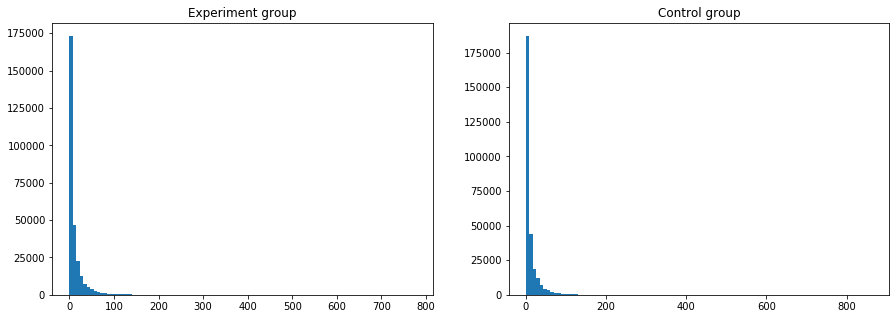

In [171]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(ab_data.n_clicks.loc[exp], bins=100)
plt.title('Experiment group')
plt.subplot(122)
plt.hist(ab_data.n_clicks.loc[ctrl], bins=100)
plt.title('Control group')

**4.** t-критерий Стьюдента имеет множество достоинств, и потому его достаточно часто применяют в AB экспериментах. Иногда его применение может быть необоснованно из-за сильной скошенности распределения данных.
Для простоты рассмотрим одновыборочный t-критерий. Чтобы действительно предположения t-критерия выполнялись необходимо, чтобы:
- среднее значение в выборке было распределено нормально N(μ,σ2n)
- несмещенная оценка дисперсии c масштабирующим коэффициентом была распределена по хи-квадрат c n−1 степенями свободы χ2(n−1)

Оба этих предположения можно проверить с помощью бутстрепа. Ограничимся сейчас только контрольной группой, в которой распределение кликов будем называть данными в рамках данного вопроса.

Поскольку мы не знаем истинного распределения генеральной совокупности, мы можем применить бутстреп, чтобы понять, как распределены среднее значение и выборочная дисперсия.
Для этого
- получим из данных n_boot_samples псевдовыборок.
- по каждой из этих выборок посчитаем среднее и сумму квадратов отклонения от выборочного среднего
- для получившегося вектора средних значений из n_boot_samples построим q-q plot с помощью scipy.stats.probplot для нормального распределения
- для получившегося вектора сумм квадратов отклонения от выборочного среднего построим qq-plot с помощью scipy.stats.probplot для хи-квадрат распределения

Text(0.5, 1.0, 'Probability plot for means')

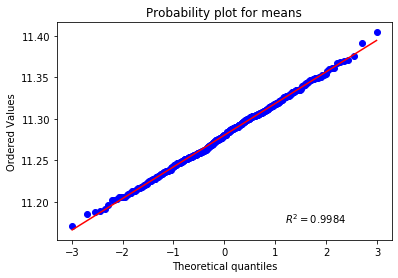

In [172]:
stats.probplot(ctrl_cl_mean, plot=plt, rvalue=True)
plt.title('Probability plot for means')

Text(0.5, 1.0, 'Probability plot for variances')

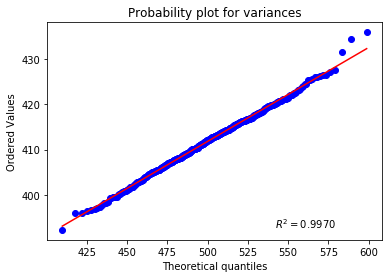

In [173]:
stats.probplot(ctrl_cl_var, plot=plt, dist='chi2', sparams=(ctrl_cl_mean.shape[0]-1), rvalue=True)
plt.title('Probability plot for variances')

**5.** Одним из возможных аналогов t-критерия, которым можно воспрользоваться, является тест Манна-Уитни. На достаточно обширном классе распределений он является асимптотически более эффективным, чем t-критерий, и при этом не требует параметрических предположений о характере распределения.

Разделим выборку на две части, соответствующие control и exp группам. Преобразуем данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверим гипотезу о равенстве средних.

In [174]:
users_nclicks_exp = ab_data.loc[exp].groupby(['userID', 'browser']).sum().loc[:,'n_clicks']
users_nclicks_ctrl = ab_data.loc[ctrl].groupby(['userID', 'browser']).sum().loc[:,'n_clicks']

users_nclicks_exp.head()
users_nclicks_ctrl.head()

userID  browser
6       4          12
8       4           4
10      4          22
15      14          2
23      4           3
Name: n_clicks, dtype: int64

In [175]:
stats.mannwhitneyu(users_nclicks_exp, users_nclicks_ctrl, alternative='two-sided')

MannwhitneyuResult(statistic=41184125116.0, pvalue=6.247235801369629e-75)

**6** Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

Для этого примените для каждого из срезов (по каждому из уникальных значений столбца browser) критерий Манна-Уитни между control и exp группами и сделайте поправку Холма-Бонферрони на множественную проверку с α=0.05.

Какое заключение можно сделать исходя из полученных результатов ?

In [176]:
browsers_nclicks_exp = ab_data.loc[exp].groupby(['browser', 'userID']).sum().loc[:,'n_clicks']
browsers_nclicks_ctrl = ab_data.loc[ctrl].groupby(['browser', 'userID']).sum().loc[:,'n_clicks']

browsers_nclicks_exp.head()
browsers_nclicks_ctrl.head()

browser  userID
2        29         9
         32         3
         60         5
         70         5
         73        13
Name: n_clicks, dtype: int64

In [177]:
browsers = np.unique(ab_data.browser)
print('Unique browsers numbers: ' + str(browsers))
print('')

print('Mann-Whitney rank test without multipletest')
mw_p = np.empty(browsers.shape[0])
for i, br in enumerate(browsers):
    print('Browser #%d: ' % br),
    _, mw_p[i] = stats.mannwhitneyu(browsers_nclicks_exp.loc[br, :], browsers_nclicks_ctrl.loc[br, :], alternative='two-sided')
    print('p-value = %.4f' % mw_p[i])

print('')
print('Mann-Whitney rank test with multipletest')
_, mw_p_corr, _, _ = multipletests(mw_p, alpha = 0.05, method = 'holm')
for i, br in enumerate(browsers):
    print('Browser #%d: ' % br),
    print('p-value = %.4f' % mw_p_corr[i])

Unique browsers numbers: [ 2  4 14 17 20 22]

Mann-Whitney rank test without multipletest
Browser #2: 
p-value = 0.0545
Browser #4: 
p-value = 0.8152
Browser #14: 
p-value = 0.0000
Browser #17: 
p-value = 0.0748
Browser #20: 
p-value = 0.9073
Browser #22: 
p-value = 0.5148

Mann-Whitney rank test with multipletest
Browser #2: 
p-value = 0.2724
Browser #4: 
p-value = 1.0000
Browser #14: 
p-value = 0.0000
Browser #17: 
p-value = 0.2992
Browser #20: 
p-value = 1.0000
Browser #22: 
p-value = 1.0000


**7.** Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

Сходятся ли результаты проведенного Вами анализа с показателем процента некликнутых запросов ? 

In [178]:
browsers_nonclk_q_exp = ab_data.loc[exp].groupby(['browser']).sum().loc[:,'n_nonclk_queries']
browsers_clk_q_exp = ab_data.loc[exp].groupby(['browser']).sum().loc[:,'n_queries']
browsers_nonclk_q_prop_exp = browsers_nonclk_q_exp / browsers_clk_q_exp

browsers_nonclk_q_ctrl = ab_data.loc[ctrl].groupby(['browser']).sum().loc[:,'n_nonclk_queries']
browsers_clk_q_ctrl = ab_data.loc[ctrl].groupby(['browser']).sum().loc[:,'n_queries']
browsers_nonclk_q_prop_ctrl = browsers_nonclk_q_ctrl / browsers_clk_q_ctrl

print('Control / experimental groups')
for br in browsers:
    print('Browser #%d' % br),
    print(browsers_nonclk_q_prop_ctrl.loc[browsers_nonclk_q_prop_ctrl.index == br].values),
    print('/'),
    print(browsers_nonclk_q_prop_exp.loc[browsers_nonclk_q_prop_ctrl.index == br].values)

Control / experimental groups
Browser #2
[0.45962747]
/
[0.44982747]
Browser #4
[0.4697093]
/
[0.45142942]
Browser #14
[0.57590411]
/
[0.43755617]
Browser #17
[0.36299367]
/
[0.36937413]
Browser #20
[0.40540485]
/
[0.38977376]
Browser #22
[0.40593977]
/
[0.39853947]


# Анализ эффективности удержания

В этом задании вам предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:

- state — штат США
- account_length — длительность использования аккаунта
- area_code — деление пользователей на псевдорегионы, использующееся в телекоме
- intl_plan — подключена ли у пользователя услуга международного общения
- vmail_plan — подключена ли у пользователя услуга голосовых сообщений
- vmail_message — количество голосых сообщений, который пользователь отправил / принял
- day_calls — сколько пользователь совершил дневных звонков
- day_mins — сколько пользователь проговорил минут в течение дня
- day_charge — сколько пользователь заплатил за свою дневную активность
- eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
- night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
- intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
- custserv_calls — сколько раз пользователь позвонил в службу поддержки
- treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
- mes_estim — оценка интенсивности пользования интернет мессенджерами
- churn — результат оттока: перестал ли абонент пользоваться услугами оператора

In [179]:
churn = pd.read_csv('../data/churn_analysis.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3333 non-null   int64  
 1   state           3333 non-null   object 
 2   account_length  3333 non-null   int64  
 3   area_code       3333 non-null   int64  
 4   intl_plan       3333 non-null   object 
 5   vmail_plan      3333 non-null   object 
 6   vmail_message   3333 non-null   int64  
 7   day_mins        3333 non-null   float64
 8   day_calls       3333 non-null   int64  
 9   day_charge      3333 non-null   float64
 10  eve_mins        3333 non-null   float64
 11  eve_calls       3333 non-null   int64  
 12  eve_charge      3333 non-null   float64
 13  night_mins      3333 non-null   float64
 14  night_calls     3333 non-null   int64  
 15  night_charge    3333 non-null   float64
 16  intl_mins       3333 non-null   float64
 17  intl_calls      3333 non-null   i

In [180]:
pd.set_option('display.max_columns', None)
churn.drop('Unnamed: 0', axis=1, inplace=True)
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [181]:
churn.churn.loc[churn.churn == 'True.'] = True
churn.churn.loc[churn.churn == 'False.'] = False
churn.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False


**1.** Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Построим таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции scipy.stats.chi2_contingency(subtable, correction=False).

Заметьте, что, например, (AZ, HI) и (HI, AZ) — это одна и та же пара. Обязательно выставим correction=False (о том, что это значит мы узнаем далее).

Сколько достигаемых уровней значимости оказались меньше, чем α=0.05?

In [182]:
pt_states = pd.pivot_table(churn.loc[churn.treatment == 1], values='treatment', index='state', columns='churn',
                               aggfunc=len, fill_value=0)

In [183]:
pt_states.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [184]:
chi2_val = pd.DataFrame(columns=['state 1', 'state 2', 'chi2_stat', 'p-value'])
i = 0
for st1, st2 in combinations(pt_states.index, 2):
    chi2_table = pt_states.loc[[st1, st2],:]
    chi2_val.loc[i, 'state 1'] = st1
    chi2_val.loc[i, 'state 2'] = st2
    chi2_stat = stats.chi2_contingency(chi2_table.values, correction=False)
    chi2_val.loc[i, 'chi2_stat'] = chi2_stat[0]
    chi2_val.loc[i, 'p-value'] = chi2_stat[1]
    i += 1

In [185]:
pd.set_option('display.max_rows', None)

sign_lvls_num = len(chi2_val.loc[chi2_val['p-value'] <= 0.05, :])
print('Num of significance lvls below 0.05: %d' % sign_lvls_num)

Num of significance lvls below 0.05: 34


**3.** В основе критерия xи-квадрат лежит предположение о том, что если верна нулевая гипотеза, то дискретное биномиальное распределение данных по клеткам в таблице сопряженности может быть аппроксимировано с помощью непрерывного распределения xи-квадрат. Однако точность такой аппроксимации существенно зависит от суммарного количества наблюдений и их распределения в этой таблице (отсюда и ограничения при использовании критерия xи-квадрат).

Одним из способов коррекции точности аппроксимации является поправка Йетса на непрерывность. Эта поправка заключается в вычитании константы 0.5 из каждого модуля разности наблюденного Oi и ожидаемого Ei значений, то есть, статистика с такой поправкой выглядит так:

χ2Yates=∑i=1N(|Oi−Ei|−0.5)2Ei.

Такая поправка, как несложно догадаться по формуле, как правило, уменьшает значение статистики χ2, то есть увеличивает достигаемый уровень значимости.

Эта поправка обычно используется для таблиц сопряженности размером 2x2 и для небольшого количества наблюдений. Такая поправка, однако, не является серебрянной пулей, и часто критикуется за то, что статистический критерий при ее использовании становится слишком консервативным, то есть часто не отвергает нулевую гипотезу там, где она неверна (совершает ошибку II рода).

Полезно знать, что эта поправка часто включена по умолчанию (например, в функции scipy.stats.chi2_contingency) и понимать ее влияние на оценку достигаемого уровня значимости.

Проведите те же самые сравнения, что и в вопросе №1, только с включенной коррекцией scipy.stats.chi2_contingency(subtable, correction=True) и сравните полученные результаты, отметив все верные варианты.

In [186]:
chi2_val = pd.DataFrame(columns=['state 1', 'state 2', 'chi2_stat', 'p-value'])
i = 0
for st1, st2 in combinations(pt_states.index, 2):
    chi2_table = pt_states.loc[[st1, st2],:]
    chi2_val.loc[i, 'state 1'] = st1
    chi2_val.loc[i, 'state 2'] = st2
    chi2_stat = stats.chi2_contingency(chi2_table.values, correction=True)
    chi2_val.loc[i, 'chi2_stat'] = chi2_stat[0]
    chi2_val.loc[i, 'p-value'] = chi2_stat[1]
    i += 1

In [187]:
sign_lvls_num = len(chi2_val.loc[chi2_val['p-value'] <= 0.05, :])
print('Num of significance lvls below 0.05: %d' % sign_lvls_num)

Num of significance lvls below 0.05: 0


**4.** Что если у нас мало данных, мы не хотим использовать аппроксимацию дискретного распределения непрерывным и использовать сомнительную поправку, предположения критерия xи-квадрат не выполняются, а проверить гипотезу о том, что данные принадлежат одному распределению, нужно?

В таком случае прибегают к так называемому точному критерию Фишера. Этот критерий не использует приближений и в точности вычисляет значение достигаемого уровня значимости используя комбинаторный подход.

Пусть у нас есть таблица сопряженности 2x2:

- Группа 1 Группа 2 Σ
- Воздействие 1 a b a+b
- Воздействие 2 c d c+d
- Σ a+c b+d n=a+b+c+d

Тогда вероятность получить именно такие a,b,c,d при фиксированных значениях сумм по строкам и по столбцам) задается выражением

p=(a+ba)(c+dc)(na+c)=(a+b)! (c+d)! (a+c)! (b+d)!a! b! c! d! n!.

В числителе этой дроби стоит суммарное количество способов выбрать a и c из a+b и c+d соответственно. А в знаменателе — количество способов выбрать число объектов, равное сумме элементов первого столбца a+c из общего количества рассматриваемых объектов n.

Чтобы посчитать достигаемый уровень значимости критерия Фишера, нужно перебрать все возможные значения a,b,c,d, в клетках этой таблицы так, чтобы построковые и постолбцовые суммы не изменились. Для каждого такого набора a,b,c,d нужно вычислить значение pi по формуле выше и просуммировать все такие значения pi, которые меньше или равны p, которое мы вычислили по наблюдаемым значениям a,b,c,d.

Понятно, что такой критерий вычислительно неудобен в силу большого количества факториалов в формуле выше. То есть даже при небольших выборках для вычисления значения этого критерия приходится оперировать очень большими числами. Поэтому данным критерием пользуются обычно только для таблиц 2x2, но сам критерий никак не ограничен количеством строк и столбцов, и его можно построить для любой таблицы n×m.

Посчитайте для каждой пары штатов, как и в первом задании, достигаемый уровень значимости с помощью точного критерия Фишера и сравните получившиеся значения с двумя другими подходами, описанными выше.

Точный критерий Фишера удобно вычислять с помощью функции scipy.stats.fisher_exact которая принимает на вход таблицу сопряженности 2x2.

In [188]:
fisher_val = pd.DataFrame(columns=['state 1', 'state 2', 'fisher_stat', 'p-value'])
i = 0
for st1, st2 in combinations(pt_states.index, 2):
    fisher_table = pt_states.loc[[st1, st2],:]
    fisher_val.loc[i, 'state 1'] = st1
    fisher_val.loc[i, 'state 2'] = st2
    fisher_stat = stats.fisher_exact(fisher_table.values)
    fisher_val.loc[i, 'fisher_stat'] = fisher_stat[0]
    fisher_val.loc[i, 'p-value'] = fisher_stat[1]
    i += 1

In [189]:
chi2_val.head()

,state 1,state 2,chi2_stat,p-value
0,AK,AL,0.639205,0.423999
1,AK,AR,2.7225,0.0989429
2,AK,AZ,0.00213816,0.963119
3,AK,CA,3.05496,0.0804911
4,AK,CO,1.4358,0.230821


In [190]:
fisher_val.head()

,state 1,state 2,fisher_stat,p-value
0,AK,AL,3.8,0.381063
1,AK,AR,8.63636,0.0688616
2,AK,AZ,2.23529,0.60499
3,AK,CA,9.5,0.0639647
4,AK,CO,5.58824,0.187034


Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

In [191]:
print('Pearson correlation: %.4f' % stats.pearsonr(churn.day_calls, churn.mes_estim)[0])
print('P-value: %.4f' % stats.pearsonr(churn.day_calls, churn.mes_estim)[1])

Pearson correlation: -0.0518
P-value: 0.0028


Еще раз рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Спирмена между этими признаками на всех данных, ее значимость.

In [192]:
print('Spearman correlation: %.4f' % stats.spearmanr(churn.day_calls, churn.mes_estim)[0])
print('P-value: %.4f' % stats.spearmanr(churn.day_calls, churn.mes_estim)[1])

Spearman correlation: 0.0433
P-value: 0.0123


**7.** Как можно интерпретировать полученные значения коэффициентов корреляции и достигаемые уровни значимости при проверки гипотез о равенстве нулю этих коэффициентов?

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([0.05, 0.05, 0.05, ..., 0.89, 0.91, 0.96])),
 (0.13861708020693372, 0.4842364236423642, 0.9996050483985331))

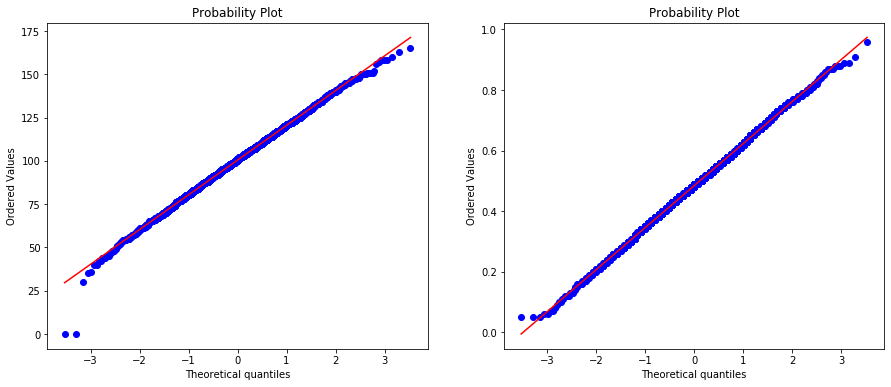

In [193]:
plt.figure(figsize=(15,6))
plt.subplot(121)
stats.probplot(churn.day_calls, dist="norm", plot=plt)
plt.subplot(122)
stats.probplot(churn.mes_estim, dist="norm", plot=plt)

Text(0, 0.5, 'mes_estim')

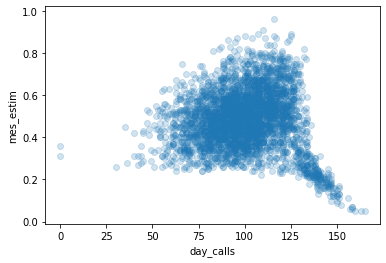

In [194]:
plt.scatter(churn.day_calls, churn.mes_estim, alpha=0.2)
plt.xlabel('day_calls')
plt.ylabel('mes_estim')

**8.** Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

In [195]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [196]:
print('V Cramer stat value: %.4f' % cramers_stat(pt_states.values))

V Cramer stat value: 0.2004


In [197]:
print('p-value: %.4f' % stats.chi2_contingency(pt_states.values)[1])

p-value: 0.7098


**9.** Вы прослушали большой курс и к текущему моменту обладете достаточными знаниями, чтобы попытаться самостоятельно выбрать нужный метод / инструмент / статистический критерий и сделать правильное заключение.

В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2)!

In [198]:
pt_states = pd.pivot_table(churn, values='account_length', index='state', columns=['treatment', 'churn'],
                               aggfunc=len, fill_value=0)
pt_states

treatment     0           1           2      
churn     False True  False True  False True 
state                                        
AK           15     2    19     1    15     0
AL           22     1    25     5    25     2
AR           14     3    11     5    19     3
AZ           26     0    17     2    17     2
CA           10     3    10     5     5     1
CO           20     2    17     5    20     2
CT           22     3    25     5    15     4
DC           19     3    18     1    12     1
DE           18     4    16     1    18     4
FL           16     4    18     2    21     2
GA           11     5    19     2    16     1
HI           17     1    12     1    21     1
IA           13     1    13     2    15     0
ID           22     6    16     2    26     1
IL           25     2    11     1    17     2
IN           22     4    20     3    20     2
KS           21     2    18     7    18     4
KY           18     2    21     4    12     2
LA           11     1    15     0    21     3
MA           20     2    17     7    17     2
MD           11     6    19     5    23     6
ME           14     4    20     8    15     1
MI           22     6    17     5    18     5
MN           28     6    19     2    22     7
MO           22     1    17     4    17     2
MS           15     9    20     4    16     1
MT           19     6    22     4    13     4
NC           21     4    16     3    20     4
ND           17     2    21     3    18     1
NE           16     1    21     3    19     1
NH           20     3    10     2    17     4
NJ           12     7    20     4    18     7
NM           14     3    27     2    15     1
NV           11     3    18     6    23     5
NY           22     4    27     6    19     5
OH           25     3    22     2    21     5
OK           19     1    11     2    22     6
OR           18     7    18     3    31     1
PA           13     3    14     4    10     1
RI           15     1    18     4    26     1
SC           15     3    16     5    15     6
SD           19     2    20     3    13     3
TN           18     1    11     1    19     3
TX           26     7    14     6    14     5
UT           23     4    18     4    21     2
VA           22     2    20     3    30     0
VT           24     1    18     5    23     2
WA           20     4    16     7    16     3
WI           25     4    22     2    24     1
WV           37     2    27     5    32     3
WY           23     4    20     2    25     3

In [199]:
props_churn = np.array([pt_states.loc[:, treat].loc[:, True].sum() / 
                        (pt_states.loc[:, treat].loc[:, False].sum() + pt_states.loc[:, treat].loc[:, True].sum())
                        for treat in range(3)])
for i, prop in enumerate(props_churn):
    print('Treatment #%d prop. of churn = 1: %.4f' % (i, prop))

Treatment #0 prop. of churn = 1: 0.1456
Treatment #1 prop. of churn = 1: 0.1641
Treatment #2 prop. of churn = 1: 0.1251


In [200]:
wilson_ints = np.array([proportion_confint(pt_states.loc[:, treat].loc[:, True].sum(),
                                           (pt_states.loc[:, treat].loc[:, False].sum() + pt_states.loc[:, treat].loc[:, True].sum()),
                                           method='wilson') for treat in range(3)])
for i, wils in enumerate(wilson_ints):
    print('Treatment #%d prop. of churn = 1: %s' % (i, str(wils)))

Treatment #0 prop. of churn = 1: [0.12628913 0.16736788]
Treatment #1 prop. of churn = 1: [0.14334707 0.18716506]
Treatment #2 prop. of churn = 1: [0.1068801  0.14594876]


In [201]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    l1 = sample1.loc[:, False].sum() + sample1.loc[:, True].sum()
    l2 = sample2.loc[:, False].sum() + sample2.loc[:, True].sum()
    p1 = sample1.loc[:, True].sum() / l1
    p2 = sample2.loc[:, True].sum() / l2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ l1 + p2 * (1 - p2)/ l2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ l1 + p2 * (1 - p2)/ l2)
    
    return (left_boundary, right_boundary)

In [202]:
def proportions_diff_z_stat_ind(sample1, sample2):
    l1 = sample1.loc[:, False].sum() + sample1.loc[:, True].sum()
    l2 = sample2.loc[:, False].sum() + sample2.loc[:, True].sum()
    p1 = sample1.loc[:, True].sum() / l1
    p2 = sample2.loc[:, True].sum() / l2
    P = (p1*l1 + p2*l2) / (l1 + l2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / l1 + 1. / l2))

In [203]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [204]:
p_val_table = np.empty((3, 3))
i = 0
for tr1, tr2 in combinations(range(3), 2):
    print('Treatments #%d and %d: ' % (tr1, tr2)),
    confint_diff = proportions_confint_diff_ind(pt_states.loc[:, tr1], pt_states.loc[:, tr2])
    print('[%.4f, %.4f], ' % confint_diff),
    p_val = proportions_diff_z_test(proportions_diff_z_stat_ind(pt_states.loc[:, tr1], pt_states.loc[:, tr2]))
    p_val_table[i, :] = tr1, tr2, p_val
    i += 1
    print('p-value: %.4f' % p_val)
p_val_table

Treatments #0 and 1: 
[-0.0485, 0.0116], 
p-value: 0.2283
Treatments #0 and 2: 
[-0.0078, 0.0489], 
p-value: 0.1564
Treatments #1 and 2: 
[0.0096, 0.0683], 
p-value: 0.0093


array([[0.        , 1.        , 0.22833116],
       [0.        , 2.        , 0.15642469],
       [1.        , 2.        , 0.00934808]])

In [205]:
_, p_corrected, _, _ = multipletests(p_val_table[:,2], alpha = 0.05, method = 'fdr_bh') 
p_corrected

array([0.22833116, 0.22833116, 0.02804425])